

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Angga Ramda Ramadhan
- **Email:** anggaramdawork@gmail.com
- **ID Dicoding:** angga1212

## Menentukan Pertanyaan Bisnis

- Pada tahun 2017 bulan 02, dan tanggal 24, apa yang membuat kota Gucheng menjadi kota dengan  rata-rata nilai PM2.5 tertinggi, sehingga menjadikan kualitas udara dalam kota ini lebih buruk di bandingkan dengan yang lain?, berikan juga solusinya.
- Dalam rentang waktu 1 tahun, bagaimana keadaan kondisi udara dari setiap kota berdasarkan nilai PM2.5 nya?.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob
import folium
from IPython.display import display

## Data Wrangling

### Gathering Data

In [2]:
path = r'C:\Users\ASUS\submission\data\Air-quality-dataset\PRSA_Data_20130301-20170228\\'

all_files = glob.glob(path + "*.csv")
data_list = []

for file in all_files:
    df = pd.read_csv(file)
    data_list.append(df)
    
df = pd.concat(data_list, ignore_index=True)
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Karena dateset "Air-quality-dataset" memiliki beberapa file csv dalam sebuah folder maka dari itu untuk mempermudah tahap gathering data saya menggunakan fungsi perulangan dan library glob untuk membaca path dari folder dan file CSV.
- Untuk meratakan index menjadi dari kumpulan data frame menjadi sebuah dataframe, saya menggunakan function concat dan menetapkan ignore_index=True 

In [3]:
df.to_csv('df.csv')

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Pada kolom station terdapat 12 kelas unique, station yang mendapatkan top frequency adalah Aotizhongxin sebesar 35064.
- Pada kolom wd terdapat 16 kelas unique, di mana nilai frequeny tertinggi yaitu kelas NE sebesar 43335.
- Berdasarkan data yang digunakan diketahui bahwa rata-rata dari variabel year adalah tahun 2015 (dibulatkan), dengan rentang tahun 2013 sampai 2017. Selanjutnya nilai q1 dalam variabel year adalah tahun 2014, q2 tahun 2015, dan quartile 3 2016. Karena nilai median dan mean sama, di asumsikan bahwa pada variabel year distribusi datanya simetris.
- Selanjutnya pada variabel month di ketahui bahwa value dalam variabel ini sudah sesuai dengan format bulan dalam 1 tahun, di mana nilai minimumnya 1 menandakan bulan januari dan nilai maxnya 12 menandakan bulan desember.
- Sama halnya dengan variabel month, begitu juga dengan variabel name, karena value  dari variable name memiliki input tanggal dari 1 sampai 31 dengan rata rata hari sebesar 16.
- Dari sini kita bisa menggabungkan variabel year, month, dan day untuk membuat 1 variabel datetime secara lengkap mulai dari tahun sampai hari.
- Selanjutya diketahui berdasarkan informasi yang di tampilan dalam staistika deskriptive, terdapat nilai extreme yang ditemukan pada variabel PM2.5	PM10	SO2	NO2	CO	O3, dengan nilai maks dan standard deviasi yang terlalu tinggi. Nantinya pada tahap data cleaning akan lebih di pastikan kembali apakah data ini memiliki outlier dari beberapa variable ini atau tidak.


In [6]:
missing_value = df.isnull().sum()
print("Jumlah Missing Value:\n",missing_value)

Jumlah Missing Value:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [7]:
missing_value.sum()

74027

In [8]:
duplikat_data = df.duplicated().sum()
print("Jumlah Data Duplikat: ", duplikat_data)

Jumlah Data Duplikat:  0


In [9]:
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[numeric_col]

df_num.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [10]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outlier_counts[column] = outlier_count

    return outlier_counts



outlier = count_outliers(df_num)

print(outlier)


{'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0, 'PM2.5': 19142, 'PM10': 14658, 'SO2': 35566, 'NO2': 7021, 'CO': 28054, 'O3': 16599, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 16520, 'WSPM': 23079}


**Insight:**
- Diketahui setelah pengecekan kebersihan data, data yang diolah masih belum bersih, hal ini di buktikan dengan hasil pengecekan missing value yang menddeteksi bahwa ada 74027 data yang terdapat missing value di dalamnya. Selanjutnya, diketahui bahwa data yang diolah pun masih memiliki nilai yang extreme  di beberapa variabel seperti pada  'PM2.5': 19142, 'PM10': 14658, 'SO2': 35566, 'NO2': 7021, 'CO': 28054, 'O3': 16599, 'RAIN': 16520, 'WSPM': 23079. Hal ini menyebabkan data masih perlu di bersihkan pada tahap selanjutnya yaitu data cleaning

### Cleaning Data

In [11]:
df.dropna(inplace=True)
missing_value=df.isna().sum()
print("Jumlah Mis", missing_value)

Jumlah Mis No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight**
- Dapat dilihat tahap pertama yang di lakukan pada bagian data cleaning adalah pembersihan missing value dengan menggunakan metode drop.

In [12]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.5 * IQR
        upper_bound = Q3 + 0.5* IQR

        # Menghapus outlier
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

df_clean = remove_outliers(df)
outlier2 = count_outliers(df_clean)
print(outlier2)

{'No': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0, 'PM2.5': 3937, 'PM10': 725, 'SO2': 4904, 'NO2': 0, 'CO': 0, 'O3': 0, 'TEMP': 0, 'PRES': 0, 'DEWP': 0, 'RAIN': 0, 'WSPM': 0}


In [13]:
df_clean.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.0,91859.000000
mean,19294.198119,2014.847876,6.720735,15.518392,11.130602,32.942661,49.022069,5.230429,30.120713,560.055084,59.795076,16.654004,1009.114413,3.980682,0.0,1.670971
std,9199.430168,1.091885,2.952808,8.566625,7.004767,28.682251,35.490979,4.260007,16.335703,248.737698,28.069255,9.161381,9.125127,13.538344,0.0,0.782771
min,1158.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,200.000000,10.000000,-4.050000,993.100000,-24.100000,0.0,0.400000
25%,12049.000000,2014.000000,4.000000,8.000000,5.000000,12.000000,20.000000,2.000000,17.000000,400.000000,38.000000,9.900000,1001.600000,-8.100000,0.0,1.100000
50%,20234.000000,2015.000000,7.000000,15.000000,11.000000,23.000000,40.000000,3.000000,28.000000,500.000000,58.000000,18.800000,1007.900000,6.400000,0.0,1.500000
75%,27509.000000,2016.000000,9.000000,23.000000,17.000000,46.000000,71.000000,7.000000,42.000000,700.000000,80.000000,24.000000,1016.600000,16.100000,0.0,2.200000
max,34967.000000,2017.000000,12.000000,30.000000,23.000000,155.000000,155.000000,18.400000,68.000000,1100.000000,122.000000,32.100000,1027.600000,28.000000,0.0,3.500000


In [14]:
df_clean.to_csv('df_clean.csv')

**Insight**
- Dapat dilihat bahwa setelah data dibersihkan dari missing value dan duplikat data, rata rata pada variabel PM2.5,	PM10, SO2, NO2, CO, O3,	WSPM menjadi lebih normal, di bandingkan ketika terdapat nilai extreme di dalamnya.
- Pada tahap ini saya juga save file dari data yang sudah clean agar tidak memerlukan pengulangan tahap sebelumnya bila kedepannya data in i di butuhkan. Terkecuali ada beberapa perubahan yang ingin dilakukan seperti mengisi nilai yang hilang dengan mean, median atau mode. Maka tahap sebelumnya akan di ulangi..

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
df_clean.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.000000,91859.0,91859,91859.000000,91859
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9141,NaN,10464
mean,19294.198119,2014.847876,6.720735,15.518392,11.130602,32.942661,49.022069,5.230429,30.120713,560.055084,59.795076,16.654004,1009.114413,3.980682,0.0,NaN,1.670971,NaN
std,9199.430168,1.091885,2.952808,8.566625,7.004767,28.682251,35.490979,4.260007,16.335703,248.737698,28.069255,9.161381,9.125127,13.538344,0.0,NaN,0.782771,NaN
min,1158.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,200.000000,10.000000,-4.050000,993.100000,-24.100000,0.0,NaN,0.400000,NaN
25%,12049.000000,2014.000000,4.000000,8.000000,5.000000,12.000000,20.000000,2.000000,17.000000,400.000000,38.000000,9.900000,1001.600000,-8.100000,0.0,NaN,1.100000,NaN
50%,20234.000000,2015.000000,7.000000,15.000000,11.000000,23.000000,40.000000,3.000000,28.000000,500.000000,58.000000,18.800000,1007.900000,6.400000,0.0,NaN,1.500000,NaN
75%,27509.000000,2016.000000,9.000000,23.000000,17.000000,46.000000,71.000000,7.000000,42.000000,700.000000,80.000000,24.000000,1016.600000,16.100000,0.0,NaN,2.200000,NaN


**Insight:**
- Seperti yang ada pada kesimpulan tahap pembersihan data, keselurahn nilai data sudah terlihat normal, namun ada 1 buah variabel yaitu RAIN, yang memiliki nilai min, max meaan seluruhnya 0. Hal ini tidak dapat diketahui lebih lanjut, karena keterbatasan dokumentasi dari apa sebanarnya isi variabel tersebut.
- Berbeda dari data yang masih belum bersih, terdapat perubahan nilai top frequency dari variabel station, di mana sebelumnya nilai tertinggi didapat oleh kota Aotizhongxin. Namun setelah di bersihkan berubah menjadi kota Dingling sebesar 10464, hal ini mungkin dapat disebabkan karena sebelumnya masih terdapat banyak nilai yang extreme dan bisa jadi kota tersebut memiliki baris yang terdapat missing value, sehingga ketika dilakukan pembersihan data, baris tersebut sudah hilang..
- Selanjutnya akan dilakukan penggabungan variabel year, month, dan day, untuk kemudian akan dijadikan satu sebagai variabel date dengan format tahun, bulan dan tanggal

In [16]:
df_clean['date'] =  pd.to_datetime(df_clean[['year', 'month', 'day']])
df_clean.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
1157,1158,2013,4,18,5,5.0,29.0,6.0,28.0,300.0,54.0,6.3,1018.4,-10.0,0.0,NNE,2.2,Aotizhongxin,2013-04-18
1158,1159,2013,4,18,6,12.0,41.0,9.0,38.0,300.0,46.0,7.9,1019.6,-10.5,0.0,NNE,3.0,Aotizhongxin,2013-04-18
1159,1160,2013,4,18,7,12.0,53.0,9.0,43.0,400.0,41.0,9.2,1020.1,-13.3,0.0,NE,2.9,Aotizhongxin,2013-04-18
1160,1161,2013,4,18,8,12.0,35.0,6.0,28.0,400.0,59.0,9.8,1020.5,-13.5,0.0,NE,2.9,Aotizhongxin,2013-04-18
1161,1162,2013,4,18,9,10.0,37.0,3.0,18.0,300.0,69.0,10.9,1020.3,-13.3,0.0,NNE,3.1,Aotizhongxin,2013-04-18


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91859 entries, 1157 to 420670
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       91859 non-null  int64         
 1   year     91859 non-null  int64         
 2   month    91859 non-null  int64         
 3   day      91859 non-null  int64         
 4   hour     91859 non-null  int64         
 5   PM2.5    91859 non-null  float64       
 6   PM10     91859 non-null  float64       
 7   SO2      91859 non-null  float64       
 8   NO2      91859 non-null  float64       
 9   CO       91859 non-null  float64       
 10  O3       91859 non-null  float64       
 11  TEMP     91859 non-null  float64       
 12  PRES     91859 non-null  float64       
 13  DEWP     91859 non-null  float64       
 14  RAIN     91859 non-null  float64       
 15  wd       91859 non-null  object        
 16  WSPM     91859 non-null  float64       
 17  station  91859 non-null  object 

In [18]:
df_clean.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
1157,1158,2013,4,18,5,5.0,29.0,6.0,28.0,300.0,54.0,6.3,1018.4,-10.0,0.0,NNE,2.2,Aotizhongxin,2013-04-18
1158,1159,2013,4,18,6,12.0,41.0,9.0,38.0,300.0,46.0,7.9,1019.6,-10.5,0.0,NNE,3.0,Aotizhongxin,2013-04-18
1159,1160,2013,4,18,7,12.0,53.0,9.0,43.0,400.0,41.0,9.2,1020.1,-13.3,0.0,NE,2.9,Aotizhongxin,2013-04-18
1160,1161,2013,4,18,8,12.0,35.0,6.0,28.0,400.0,59.0,9.8,1020.5,-13.5,0.0,NE,2.9,Aotizhongxin,2013-04-18
1161,1162,2013,4,18,9,10.0,37.0,3.0,18.0,300.0,69.0,10.9,1020.3,-13.3,0.0,NNE,3.1,Aotizhongxin,2013-04-18


**Insight**
- Dapat dilihat bahwa sudah terdapat variabel baru bernama 'date' dengan tipe data datetime.
- Selanjutnya variabel ini akan digunakan untuk keperluan analisis ke depannya, termasuk dalam dashboard

In [19]:
df_last_day = df_clean[df_clean['date']=='2017-02-24']

df_last_day.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
34955,34956,2017,2,24,11,22.0,29.0,17.0,30.0,600.0,80.0,8.4,1022.2,-11.6,0.0,NE,1.6,Aotizhongxin,2017-02-24
34956,34957,2017,2,24,12,21.0,21.0,14.0,23.0,500.0,90.0,9.3,1021.7,-12.6,0.0,NW,1.9,Aotizhongxin,2017-02-24
34957,34958,2017,2,24,13,16.0,19.0,13.0,22.0,400.0,94.0,10.5,1020.5,-12.2,0.0,W,1.7,Aotizhongxin,2017-02-24
34958,34959,2017,2,24,14,16.0,18.0,13.0,24.0,400.0,94.0,11.2,1019.4,-12.3,0.0,NW,2.3,Aotizhongxin,2017-02-24
34959,34960,2017,2,24,15,18.0,18.0,12.0,17.0,400.0,104.0,11.8,1018.8,-13.3,0.0,WSW,1.8,Aotizhongxin,2017-02-24


**Insight**
- Pada tahap ini saya membuat variabel baru dengan nama last day, dengan tujuan bahwa saya ingin mengetahui kondisi udara pada tahun akhir data ini di rekam dan dalam rentang 24 jam atau 1 hari.
- Adapun selanjutnya data ini akan digunakan untuk dijadikan pivot tabel dengan melihat parameter penentu kualitas udara. Selebihnya akan di analisis setelah pivot tabel di buat

In [20]:
df_last_day.groupby(by='station').agg({
    "No": "nunique",
    "PM2.5": ["min", "max", "mean"],
    "PM10": ["min", "max", "mean"],
    "SO2": ["min", "max", "mean"],
    "CO": ["min", "max", "mean"],
    "O3":["min", "max", "mean"],
    "NO2": ["min", "max", "mean"]
})

No PM2.5                   PM10                    SO2  \
              nunique   min   max       mean   min   max       mean   min   
station                                                                     
Aotizhongxin       10   9.0  22.0  14.500000  13.0  29.0  19.700000  10.0   
Changping          13  13.0  32.0  19.307692  18.0  37.0  26.923077   6.0   
Dingling           16   5.0  24.0  13.000000   8.0  32.0  19.500000   2.0   
Dongsi             15  10.0  22.0  15.533333  25.0  42.0  30.333333   5.0   
Guanyuan           13   7.0  27.0  16.384615  17.0  41.0  26.923077   4.0   
Gucheng             6  10.0  27.0  20.833333  34.0  50.0  41.666667   7.0   
Huairou            16   4.0  23.0  14.625000  10.0  56.0  24.312500   2.0   
Nongzhanguan       11   7.0  24.0  13.818182   9.0  35.0  22.363636   8.0   
Shunyi             10   5.0  27.0  13.200000   9.0  53.0  18.900000   2.0   
Tiantan            13   9.0  31.0  17.076923  14.0  37.0  27.153846   5.0   
Wanliu             11   8.0  20.0  14.000000  17.0  36.0  23.363636   6.0   
Wanshouxigong      14  10.0  29.0  19.000000  14.0  36.0  24.642857   3.0   

                                   CO                        O3         \
                max       mean    min     max        mean   min    max   
station                                                                  
Aotizhongxin   17.0  12.400000  300.0   600.0  410.000000  74.0  109.0   
Changping      13.0   9.384615  300.0   800.0  638.461538  26.0   58.0   
Dingling       11.0   6.687500  200.0   600.0  400.000000  51.0   90.0   
Dongsi         18.0   8.800000  300.0   800.0  520.000000  20.0   86.0   
Guanyuan       14.0   6.230769  300.0   800.0  476.923077  19.0   77.0   
Gucheng        11.0   9.000000  600.0   800.0  650.000000  41.0   74.0   
Huairou         6.0   3.500000  200.0   900.0  443.750000  25.0  107.0   
Nongzhanguan   18.0  10.636364  300.0  1100.0  563.636364  18.0   78.0   
Shunyi         12.0   6.900000  300.0   900.0  480.000000  26.0   81.0   
Tiantan        13.0   7.307692  400.0   800.0  546.153846  30.0   92.0   
Wanliu         12.0   7.545455  300.0   700.0  472.727273  48.0   88.0   
Wanshouxigong  13.0   6.285714  300.0   800.0  478.571429  27.0   81.0   

                           NO2                   
                    mean   min   max       mean  
station                                          
Aotizhongxin   92.900000  11.0  37.0  22.900000  
Changping      39.230769  15.0  44.0  29.076923  
Dingling       68.687500   2.0  20.0  10.375000  
Dongsi         61.666667  13.0  66.0  30.466667  
Guanyuan       55.769231  20.0  59.0  34.923077  
Gucheng        60.166667  54.0  63.0  58.333333  
Huairou        79.625000   6.0  39.0  19.437500  
Nongzhanguan   56.636364  17.0  66.0  33.090909  
Shunyi         64.200000  12.0  54.0  23.300000  
Tiantan        69.461538  26.0  52.0  35.000000  
Wanliu         70.363636  12.0  43.0  27.000000  
Wanshouxigong  59.642857  14.0  56.0  29.357143

**Insight**
- Tahap ini saya membuat pivot tabel dengan mengkategorikan variabel station dengan beberapa parameter terkait pencemaran udara seperti PM2.5, PM10, SO2, O2, CO, O3. Adapun variabel ini saya gunakan sebagai parameter untuk menentukan baik atau buruknya kondisi udara pada suatu kota. Adapun referensi yang saya gunakan didapat dari web	"https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia" terkait Kategori Indeks Standar Pencemar Udara (ISPU) serta WHO terkait batas aman dan tidak aman kualitas udara berdasarkan parameter yang digunakan.

- Berdasarkan hasil yang didapat kota Gucheng mendapatkan rata-rata tertinggi pada parameter PM2.5, hal ini menunjukan bahwa di waktu tersebut kualitas udara dalam kota Gucheng sudah mulai masuk dalam kategori tidak aman tingkat moderate karna berada dalam rentang 16-35µg/m³.

- Lalu Gucheng juga menjadi kota dengan rata-rata tertinggi dalam parameter PM10 sebesar 41.666667, hal ini menandakan bahwa di kota ini nilai dari partikel yang dapat menyebabkan iritasi pernapasan berada pada tingkat aman, karena kurang dari ≤ 45 µg/m³ (24 jam).

- Selanjutnya dalam parameter SO2 yang mendapatkan nilai rata-rata tertinggi adalah kota Aotizhongxin, sebesar 12.400000, nilai ini masih ada dalam kategori aman karena kurang dari 40 µg/m³ (24 jam).

- Berikutnya pada parameter CO, nilai rata-rata tertinggi di dapat oleh kota Gucheng, sebesar 650.000000. Hal ini berarti kualitas udara dalam parameter CO di kota ini tergolong tidak sehat untuk beberapa kelompok tertentu, semisal yang memilki penyakit paru-paru karena berada pada rentang 6001-8000 µg/m³.

- Selanjutnya pada parameter O3, diketahui nilai rata-rata tertinggi didapatkan oleh kota Aotizhongxin, dengan nilai rata-rata sebesar 92.900000. Yang menandakan kota ini masih tergolong aman karena memiliki nilai ≤ 100 µg/m³.

- Terakhir merupakan nilai yang didapat dari parameter NO2, kota dengan nilai rata-rata tertinggi didapatkan oleh Gucheng, dengan nilai rata-rata sebesar 58.333333. yang menandakan nilai ini masuk kedalam kategori tidak aman bagi beberapa kelompok sensitif karena memiliki rentang nilai  51-100 µg/m³ dalam 24 jam.

In [21]:
df_1year = df_clean[df_clean['date']>='2016-01-01']
df_1year.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
24941,24942,2016,1,4,5,8.0,8.0,7.0,21.0,600.0,57.0,-0.8,1024.8,-12.4,0.0,N,2.1,Aotizhongxin,2016-01-04
24942,24943,2016,1,4,6,9.0,9.0,6.0,24.0,600.0,56.0,-1.4,1025.3,-13.0,0.0,NNW,3.2,Aotizhongxin,2016-01-04
24944,24945,2016,1,4,8,12.0,23.0,3.0,30.0,600.0,50.0,-2.1,1027.0,-13.6,0.0,NE,2.1,Aotizhongxin,2016-01-04
24945,24946,2016,1,4,9,12.0,16.0,4.0,26.0,600.0,55.0,-2.1,1027.6,-14.5,0.0,N,3.2,Aotizhongxin,2016-01-04
24947,24948,2016,1,4,11,9.0,11.0,2.0,17.0,500.0,66.0,-0.2,1027.5,-15.3,0.0,NNE,3.5,Aotizhongxin,2016-01-04


**Insight**
- Untuk menjawab pertanyaan 2 di sini saya membuat variabel yang menyimpan seluruh data 1 tahun terakhir sebelum data berhenti di rekam untuk di analisis

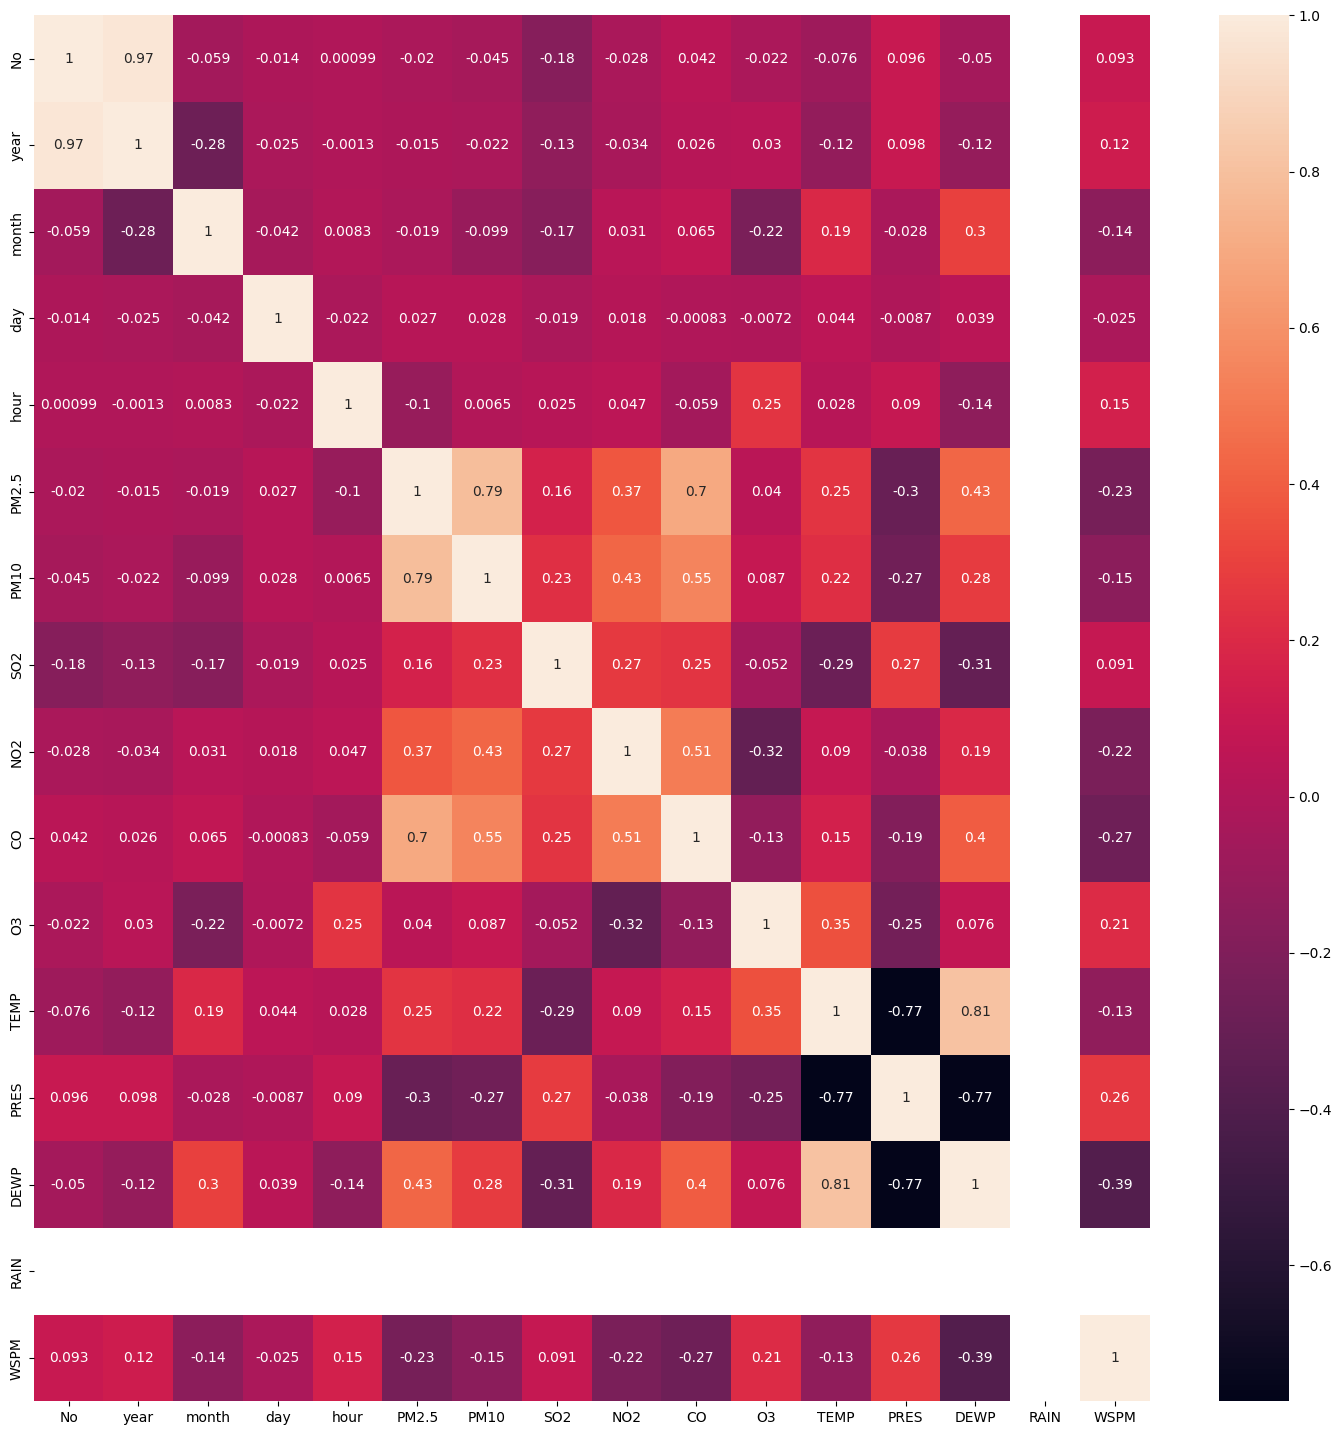

In [22]:
corr = df_clean.select_dtypes([np.number]).corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True)
plt.show()

**Insight**
- Pada tahap ini dilakukan plot untuk mengetahui korelasi dari setiap variabel, yang nantinya akan di analisis untuk menjawab pertanyaan 1, terkait mengapa di satu kota tertentu kualitas udaranya buruk. Dengan adanya heatmap korelasi hal ini bisa menunjukan mengapa parameter tertentu memiliki nilai tinggi di kota ini dan apakah ada parameter lain yang menyebabkannya (berkorelasi positif).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


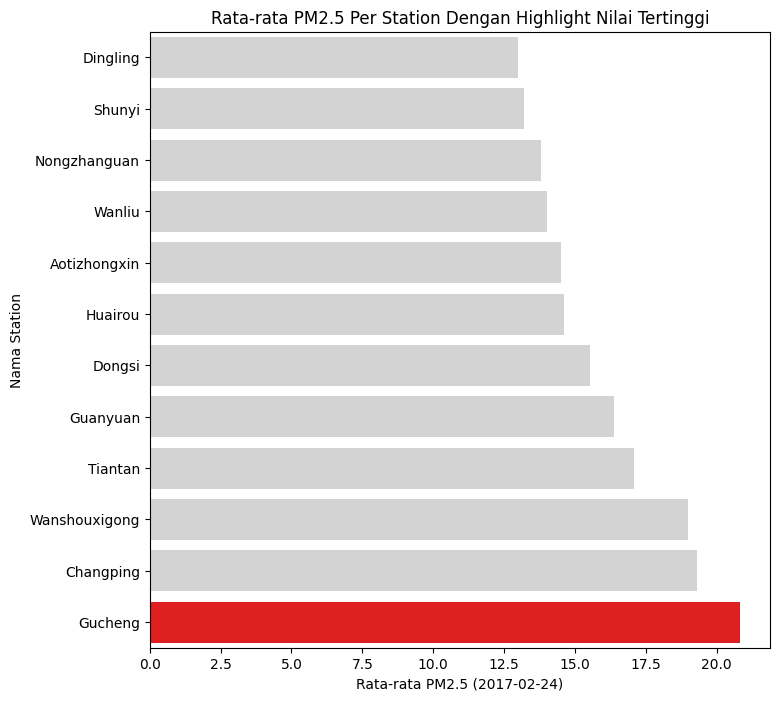

In [23]:
pm25_mean_per_station = df_last_day.groupby('station')['PM2.5'].mean().reset_index().sort_values(by='PM2.5', ascending=True)
max_value = pm25_mean_per_station['PM2.5'].max()
colors = ["red" if v==max_value else "lightgrey" for v in pm25_mean_per_station['PM2.5']]

plt.figure(figsize=(8,8))
sns.barplot(y='station', x='PM2.5', data=pm25_mean_per_station, palette=colors)
plt.title("Rata-rata PM2.5 Per Station Dengan Highlight Nilai Tertinggi")
plt.xlabel("Rata-rata PM2.5 (2017-02-24)")
plt.ylabel("Nama Station")
plt.show()

**Insight**
- Pada tahap ini saya plo menggunakan barplot untuk melihat nilai rata-rata tertinggi dari salah satu parameter kualitas udara yaitu PM2.5. Adapun tahap awal yang dilakukan adalah dengan membuat variabel bernama pm25_mean_per_station, yang isinya terdapat pengelompokan station dengan juga menghitung rata-rata dari variabel PM2.5.

- Berdasarkan visualisasi di atas, diketahui sesuai dengan tahap exploratori data, Guncheng menjadi salah satu kota dengan nilai rata-rata tertinggi berdasarkan PM2.5. Di mana artinya kota ini dalam 24 jam terakhir menjadi kota yang kualitas udaranya sedikit buruk. Adapun penyebab dari tingginya nilai PM2.5 ternyata berhubungan dengan CO, seperti dapat dilihat pada heatmap korelasi antara CO dan PM2.5 cukup tinggi sebesar 0.7

- Adapun nilai CO (Carbon Monoxide) atau Gas tidak berbau yang dihasilkan dari pembakaran tidak sempurna, dapat menyebabkan keracunan. Dapat hasil yang tinggi juga di akibatkan oleh NO2 yang tinggi. NO2(Nitrogen Dioxide) atau Gas polutan yang dihasilkan dari emisi kendaraan dan pembangkit listrik, dapat merusak saluran pernapasan. Disebabkan salah satunya karna emisi kendaraan, dengan hal ini solusi yang mungkin dapat diterapkan di kota tersebut yaitu dengan mengurangi penggunaan kendaraan pribadi, menjadi menggunakan kendaraan umum untuk mengurangi emisi.

- Selanjutnya kita akan melihat apakah dalam parameter lain seperti NO2 dan CO Guncheng mendapatkan nilai tertinggi.

c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


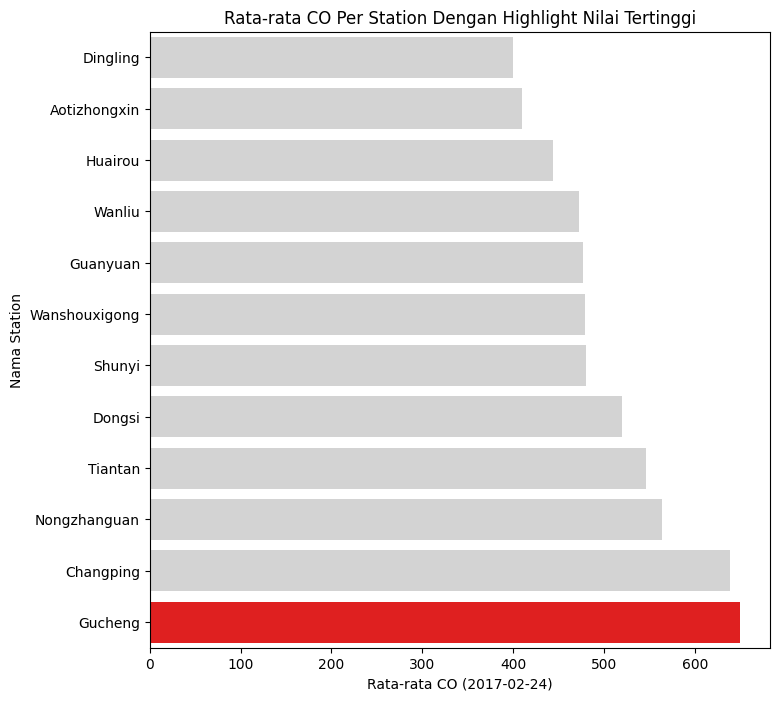

In [24]:
co_mean_per_station = df_last_day.groupby('station')['CO'].mean().reset_index().sort_values(by='CO', ascending=True)
max_value = co_mean_per_station["CO"].max()
colors = ["red" if v==max_value else "lightgrey" for v in co_mean_per_station['CO']]

plt.figure(figsize=(8,8))
sns.barplot(y='station', x='CO', data=co_mean_per_station, palette=colors)
plt.title("Rata-rata CO Per Station Dengan Highlight Nilai Tertinggi")
plt.xlabel("Rata-rata CO (2017-02-24)")
plt.ylabel("Nama Station")
plt.show()

**Insight**
- Berdasarkan visualisasi di atas di ketahui bahwa Rata-rata CO tertinggi di hari tersebut juga didapatkan oleh kota Gucheng

c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


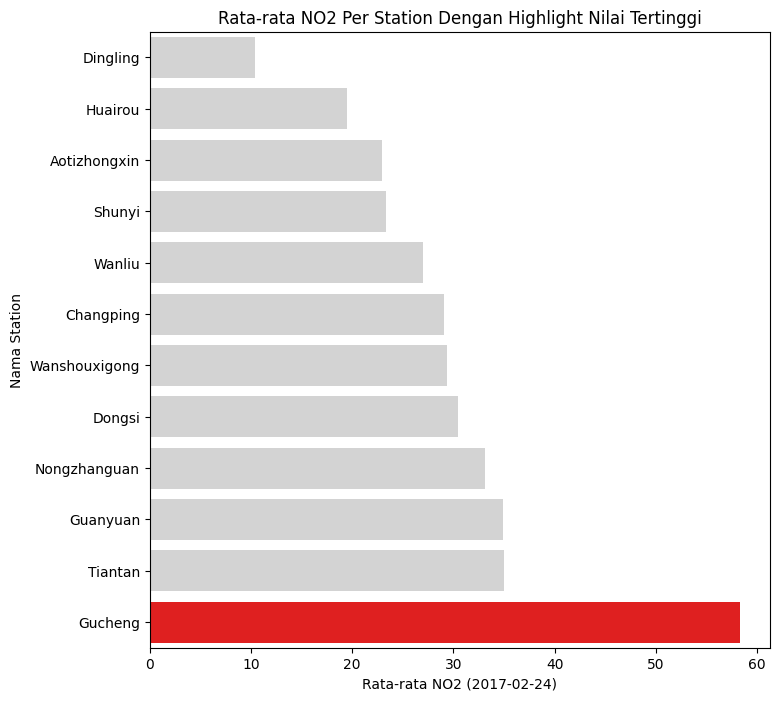

In [25]:
no2_mean_per_station = df_last_day.groupby('station')['NO2'].mean().reset_index().sort_values(by='NO2', ascending=True)
max_value = no2_mean_per_station["NO2"].max()
colors = ["red" if v==max_value else "lightgrey" for v in no2_mean_per_station['NO2']]

plt.figure(figsize=(8,8))
sns.barplot(y='station', x='NO2', data=no2_mean_per_station, palette=colors)
plt.title("Rata-rata NO2 Per Station Dengan Highlight Nilai Tertinggi")
plt.xlabel("Rata-rata NO2 (2017-02-24)")
plt.ylabel("Nama Station")
plt.show()

**Insight**
- Berdasarkan hasil visualisasi barplot diatas pun di ketahui bahwa guncheng di waktu tersbut masih mendapatkan nilai rata - rata tertinggi. Hal ini dapat disimpulkan bahwa Guncheng menjadi kota dengan kualitas udara terburuk dibandingkan dengan station lainnya. Adapun hal ini didukung dengan nilai rata-rata PM2.5, NO2, dan CO yang tinggi dibandingkan dengan station lain.

- Nilai PM2.5 tinggi bisa di sebabkan oleh banyaknya orang yang menggunakan kendaraan priadi serta dari pembangkit listrik. Hal ini dibuktikan dengan visualisasi NO2 yang menunjukan rata-rata nilai yang cukup tinggi.  

### Pertanyaan 2:

c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\dm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

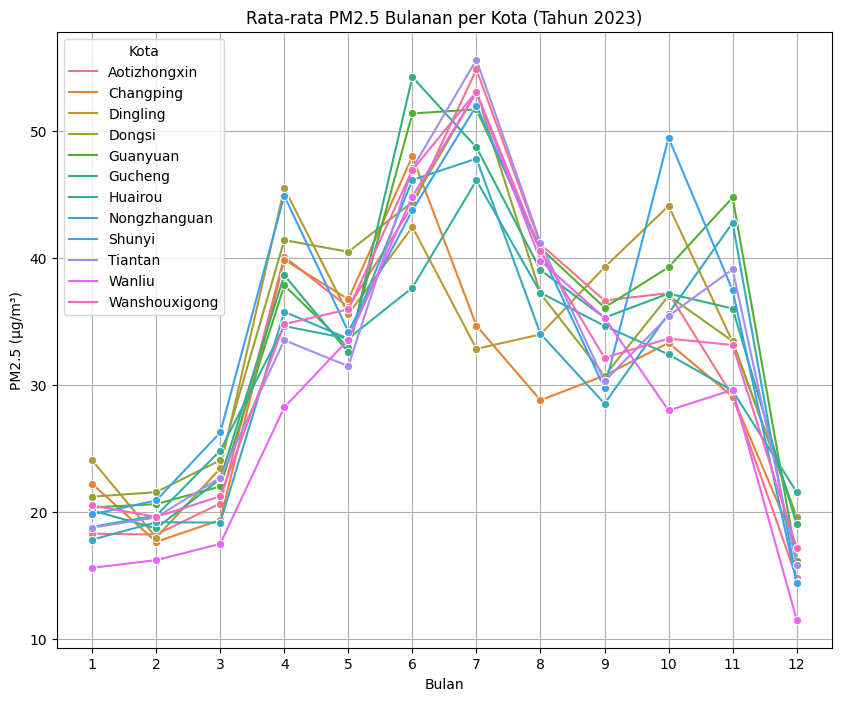

In [26]:
monthly_avg_pm25 = df_1year.groupby(['station', 'month'])['PM2.5'].mean().reset_index()

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.lineplot(data=monthly_avg_pm25, x='month', y='PM2.5', hue='station', marker='o')

# Pengaturan visualisasi
plt.title('Rata-rata PM2.5 Bulanan per Kota (Tahun 2023)')
plt.xlabel('Bulan')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Kota')
plt.show()

**Insight:**
- Pada tahap ini dilakukan visualisasi dari rata-rata nilain PM2.5 di setiap bulan pada tahun 2016, adapun alasan saya tidak memilih tahun 2017 karena bulannya yang hanya sampai februari saja, maka dari itu untuk menjawab pertanyaan 2 dan mengetahui kualitas udara dalam 1 tahun, saya memilih tahun 2016.

- Berdasarkan parameter PM2.5 diketahui pada bulan 6 dan 7 beberapa kota mengalami peningkatan nilai rata-rata PM2.5, di mana nilai tertinggi pada bulan 6 terdapat pada kota Guncheng dan pada bulan 7 nilai rata-rata tertinggi ada didapat oleh kota Tiantan.

- Namun demikian kualitas udara membaik di bulan berikutnya, walau tidak rata penurunannya, tetapi pada bulan 12 kualitas udara sudah cukup baik di seluruh Station.

In [27]:
df_clean.to_csv("df_final.csv")

**Insight**
- Pada tahap ini saya juga save df_clean kembali tetapi dalam kondisi sudah memiliki kolom baru bernama "date" untuk kemudian digunakan dalam tahap pengembangan dashboard

## Analisis Lanjutan (Opsional)

In [28]:
coordinates = {
    'Huairou': [40.392, 116.635],
    'Dingling': [39.915, 116.397],
    'Changping': [40.218, 116.203],
    'Gucheng': [39.909, 116.384],
    'Shunyi': [40.132, 116.654],
    'Tiantan': [39.883, 116.414],
    'Wanshouxigong': [39.879, 116.366],
    'Dongsi': [39.935, 116.423],
    'Guanyuan': [39.925, 116.394],
    'Nongzhanguan': [39.918, 116.448],
    'Aotizhongxin': [40.034, 116.478],
    'Wanliu': [39.992, 116.276]
}

df = pd.DataFrame({
    'station': df_last_day['station'],
    'PM2.5': df_last_day['PM2.5'] 
})

df = df[df['station'].isin(coordinates.keys())]

m = folium.Map(location=[39.9, 116.4], zoom_start=10)

for index, row in df.iterrows():
    color = 'red' if row['PM2.5'] > 20 else 'green'
    folium.CircleMarker(
        location=coordinates[row['station']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['station']}: {row['PM2.5']} µg/m³"
    ).add_to(m)

display(m)


**Insight**
- Pada tahap analisis tambahan, di sini saya melakukan geospatial analysis untuk mengetahui pada beberapa station yang ada pada dataset, kira-kira kota mana yang memiliki kualitas paling buruk dengan parameter PM2.5.

- Sebagai konteks tambahan PM2.5 adalah artikel udara halus dengan diameter ≤ 2.5 mikrometer yang dapat menembus jauh ke dalam paru-paru dan aliran darah dengan nilai aman <= 15/24 Jam.

- Tahap awal yang dilakukan pada analisis geospasial kali ini adalah menentukan titik koordinat dari setiap kota yang ada pada variabel station. Adapun titik koordinat setiap kota didapatkan di aplikasi google maps.

- Setelah titik koordinat didapatkan selanjutnya saya membuat dataframe yang isinya adalah data 1 hari terakhir sebelum data berhenti di rekam yaitu pada 2017-02-24. Setelah membuat dataframe ini, saya melakukan mapping dari setiap data station apakanh valuenya sama dengan data map koordinat yang pada tahap awal dibuat

- Selanjutnya saya membuat variable bernama m untuk menyimpan map dan menentukan titik zoom ketika program di run.

- Berikutnya dilakukan perulangan untuk setiap index dan row pada data, lalu membuat logic ketika nilai PM2.5 > 20 maka tetapkan titik menjadi berwarna merah, selain itu maka titik akan berwarna hijau

- Berdasarkan hasil analisis yang didapat, diketahui bahwa kota Guncheng menjadi kota dengan nilai rata-rata PM2.5 tertinggi melebihi 20. Hal ini menandakan bahwa kondisi udara di kota ini tidak aman karena melebihi batas 15/24jam.


## Conclusion

- Kesimpulan pertanyaan 1: Berdasarkan hasil analisis yang dilakukan, diketahui bahwa alasan kota Guncheng memiliki kualitas udara yang lebih buruk dibandingkan dengan kota lain adalah karena rata-rata nilai PM2.5 di kota ini lebih tinggi melebihi 20 dalam 24 jam terakhir. Adapun PM2.5 juga berkorelasi positif tinggi dengan CO sebesar 0.7 yang artinya nilai PM2.5 akan tinggi bila nilai CO pun tinggi, berdasarkan hal ini solusi yang dapat diberikan yaitu dengan mengurangi berkendara menggunakan kendaraan pribadi menjad menggunakan kendaraan umum guna mengurangi emisi.

- Kesimpulan Pertanyaan 2: Berdasarkan hasil analisis, diketahui kualitas udara dalam rentang 1 tahun terakhir pada setiap kota memili kualitas yang beragam diawali dengan kualitas yang cukup baik diawal tahun lalu memuncak tinggi dalam kategori tidak aman pada bulan ke-6 dan ke-7, serta membaik di akhir tahun lebih tepatnya pada bulan ke-12. Parameter yang digunakan untuk menentukan kualitas udara dalam rentang 1 tahun ini adalah PM2.5, karna parameter ini sudah cukup dijadikan sebagai parameter untuk menentukan baik atau buruknya kondisi udara bagi kesehatan.